Codes regarding the class 71 - Malarial cell classification using CNN do canal DigitalSreeni (https://www.youtube.com/watch?v=R9PPxpzj5tI&t=4s)

The idea is to train a convolutional network capable of distinguish cells contaminated with malaria from healthy ones

In [1]:
import numpy as np
import os
import cv2
from PIL import Image
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1000)
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
cell_directory = '/home/ecampelo/Documentos/Machine learning/Data_files/cell_images'
size = 64


In [4]:
parasitized_images = os.listdir(os.path.join(cell_directory, 'Parasitized')) # 13.780 images
uninfected_images = os.listdir(os.path.join(cell_directory, 'Uninfected')) # 13.780 images

## Reading the Images

In [5]:
# readind the first 100 images just for study
dataset = []
label = []
for i, image_name in enumerate(parasitized_images[:100]):
    if image_name.split('.')[1] == 'png':
        # reads as array
        image = cv2.imread(os.path.join(cell_directory, 'Parasitized', image_name))
        # convert to image
        image = Image.fromarray(image, 'RGB')
        # resize it 
        image = image.resize((size, size))
        # load it to the dataset as an array
        dataset.append(np.array(image))
        # creates the label for parasitized cells
        label.append(0)

In [6]:
for i, image_name in enumerate(uninfected_images[:100]):
    if image_name.split('.')[1] == 'png':
        # reads as array
        image = cv2.imread(os.path.join(cell_directory, 'Uninfected', image_name))
        # convert to image
        image = Image.fromarray(image, 'RGB')
        # resize it 
        image = image.resize((size, size))
        # load it to the dataset as an array
        dataset.append(np.array(image))
        # creates the label for uninfected cells
        label.append(1)

## Defining the network

In [7]:
layer = keras.layers

input_shape = (size, size, 3)

# input 
input_layer = layer.Input(shape= input_shape)

# convolutions
convolution1 = layer.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(input_layer)
pool1 = layer.MaxPooling2D(pool_size=(2,2))(convolution1) # extracts the max number on a basis 2x2 matrix
normalization1 = layer.BatchNormalization(axis= -1)(pool1) 
drop1 = layer.Dropout(rate=0.2)(normalization1) # drops 20% of nodes result

convolution2 = layer.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = layer.MaxPooling2D(pool_size=(2,2))(convolution2) # extracts the max number on a basis 2x2 matrix
normalization2 = layer.BatchNormalization(axis= -1)(pool2) 
drop2 = layer.Dropout(rate=0.2)(normalization2) # drops 20% of nodes result

flat = layer.Flatten()(drop2)

# Dense part
hidden1 = layer.Dense(512, activation= 'relu')(flat)
normalization3 = layer.BatchNormalization(axis= -1)(hidden1) 
drop3 = layer.Dropout(rate=0.2)(normalization3) # drops 20% of nodes result

hidden2 = layer.Dense(512, activation= 'relu')(drop3)
normalization4 = layer.BatchNormalization(axis= -1)(hidden2) 
drop4 = layer.Dropout(rate=0.2)(normalization4) # drops 20% of nodes result

# output
output_layer = layer.Dense(2, activation= 'sigmoid')(drop4)

# the model
model = keras.Model(inputs = input_layer, outputs = output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

# Dividing the data into train and test sets

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [10]:
X = dataset
y = to_categorical(np.array(label)) # transform into a binary class matrix

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

Epoch 1/25
5/5 [==============================] - 1s 121ms/step - loss: 0.8926 - accuracy: 0.5833 - val_loss: 0.9467 - val_accuracy: 0.5625
Epoch 2/25
5/5 [==============================] - 0s 82ms/step - loss: 0.5337 - accuracy: 0.7639 - val_loss: 2.8775 - val_accuracy: 0.3750
Epoch 3/25
5/5 [==============================] - 0s 83ms/step - loss: 0.3869 - accuracy: 0.8333 - val_loss: 3.7021 - val_accuracy: 0.4375
Epoch 4/25
5/5 [==============================] - 0s 89ms/step - loss: 0.2467 - accuracy: 0.9028 - val_loss: 2.1152 - val_accuracy: 0.7500
Epoch 5/25
5/5 [==============================] - 0s 82ms/step - loss: 0.2450 - accuracy: 0.8889 - val_loss: 4.0287 - val_accuracy: 0.5625
Epoch 6/25
5/5 [==============================] - 0s 82ms/step - loss: 0.1819 - accuracy: 0.9028 - val_loss: 5.8044 - val_accuracy: 0.4375
Epoch 7/25
5/5 [==============================] - 0s 88ms/step - loss: 0.1490 - accuracy: 0.9167 - val_loss: 5.8687 - val_accuracy: 0.3750
Epoch 8/25
5/5 [==========

AttributeError: module 'numpy' has no attribute 'arrange'

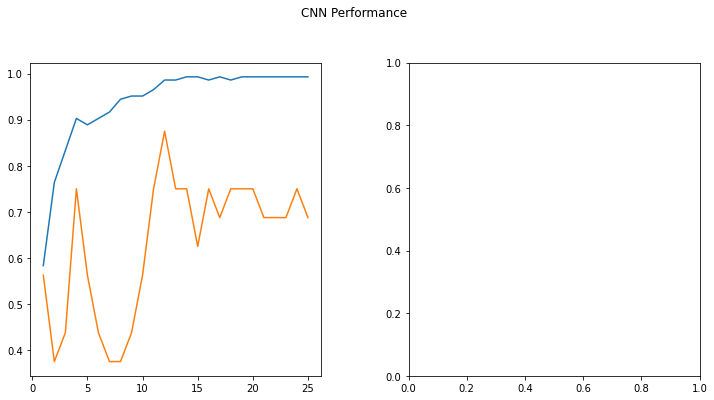

In [20]:
history = model.fit(np.array(X_train), y_train, batch_size=32, verbose=1, epochs=25, validation_split=0.1, shuffle=False)


2/2 [==============================] - 0s 5ms/step - loss: 1.7318 - accuracy: 0.5000
Test_Accuracy: 50.00%


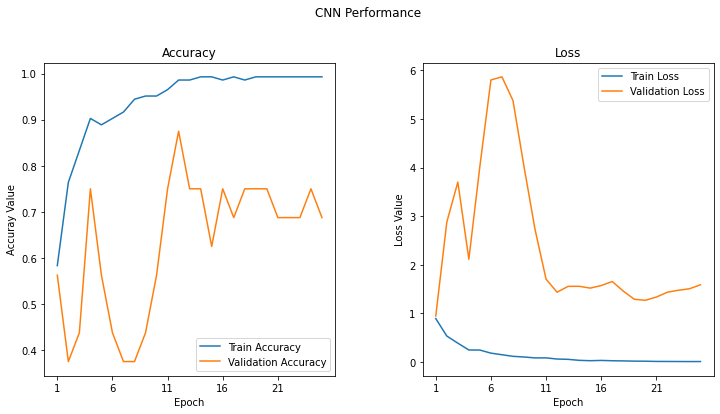

In [21]:
# Result Analysis
print('Test_Accuracy: {:.2f}%'.format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuray Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')

In [55]:
# saving the model
history.model.save('/home/ecampelo/Documentos/Machine learning/CNN_malaria_DL.h5')
# e depois
# model = keras.models.load_model('path/to/location')


In [53]:
# predicting
one_image = np.array(X_test[0:1])
y_predict = history.model.predict(one_image)
y_predict

array([[9.9949303e+01, 1.5971065e-02]], dtype=float32)

In [37]:
y_test[0:1]

array([[1., 0.]], dtype=float32)

In [50]:
(y_predict.tolist()[0])

[0.9994930028915405, 0.00015971064567565918]